# Deep learning model

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
tf.version.VERSION

'2.0.0'

## Load data

In [4]:
data_path = "Data/GeneratedData/combined_data/"
base_path = os.getcwd()

# REST
IDD = np.load(os.path.join(data_path, "IDD_rest.npy"))
TDC = np.load(os.path.join(data_path, "TDC_rest.npy"))

# MUSIC
# IDD = np.load(os.path.join(data_path, "IDD_music.npy"))
# TDC = np.load(os.path.join(data_path, "TDC_music.npy"))

X = np.concatenate((IDD, TDC))
Y = [0]*len(TDC) + [1]*len(IDD)
Y = np.asarray(Y)

In [7]:
type(X)

numpy.ndarray

In [8]:
print(X.shape)
print(Y.shape)

(3220, 14, 640)
(3220,)


In [9]:
# reshape data
X = X.reshape(X.shape[0], 14, 640, 1)
X.shape

(3220, 14, 640, 1)

## Test-train-val split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=22)

In [12]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1932, 14, 640, 1)
y_train shape: (1932,)
X_val shape: (644, 14, 640, 1)
y_val shape: (644,)
X_test shape: (644, 14, 640, 1)
y_test shape: (644,)


# Build the model


In [13]:
model = keras.Sequential([
    # Set input layer
    keras.layers.InputLayer(input_shape=(14, 640, 1)),
    
    # Normalization
    keras.layers.BatchNormalization(),
    
    # Conv + Maxpooling
    keras.layers.Conv2D(8, (3, 3), padding="same", activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Dropout
    keras.layers.Dropout(0.3),
    
    # Flatten and convert from 3D to 1D
    keras.layers.Flatten(),
    
    # Sigmoid
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])


In [14]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy'],
)

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 14, 640, 1)        4         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 640, 8)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 320, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 320, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 17920)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17921     
Total params: 18,005
Trainable params: 18,003
Non-trainable params: 2
____________________________________________________

## Training

In [16]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=128,
                    validation_data=(X_val, y_val), 
                    verbose=1)

Train on 1932 samples, validate on 644 samples
Epoch 1/20
1932/1932 [==============================] - 6s 3ms/sample - loss: 0.4858 - accuracy: 0.7516 - val_loss: 0.1549 - val_accuracy: 0.9379
Epoch 2/20
1932/1932 [==============================] - 5s 3ms/sample - loss: 0.1795 - accuracy: 0.9741 - val_loss: 0.0759 - val_accuracy: 0.9938
Epoch 3/20
1932/1932 [==============================] - 5s 3ms/sample - loss: 0.1040 - accuracy: 0.9990 - val_loss: 0.0505 - val_accuracy: 1.0000
Epoch 4/20
1932/1932 [==============================] - 5s 2ms/sample - loss: 0.0852 - accuracy: 0.9995 - val_loss: 0.0462 - val_accuracy: 1.0000
Epoch 5/20
1932/1932 [==============================] - 5s 2ms/sample - loss: 0.0680 - accuracy: 1.0000 - val_loss: 0.0423 - val_accuracy: 1.0000
Epoch 6/20
1932/1932 [==============================] - 5s 2ms/sample - loss: 0.0577 - accuracy: 0.9995 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 7/20
1932/1932 [==============================] - 5s 2ms/sample - loss:

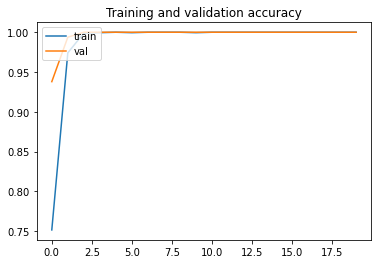

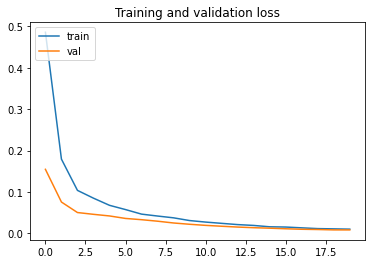

In [17]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.legend(['train', 'val'], loc='upper left')
# plt.legend(['train'], loc='upper left')


plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
plt.legend(['train', 'val'], loc='upper left')
# plt.legend(['train'], loc='upper left')

## Testing

* Music vs. No music: 68.94% 
* IDD vs TDC
    * Music: 100%
    * Rest: 100%

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

644/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 1.0
Test loss: 0.00784553136959996
